## Read datasets

In [164]:
import pandas as pd
import numpy as np
from ts_utils import *
import os

In [165]:
BTC = pd.read_parquet("BTC-USDT.parquet")
ETH = pd.read_parquet("ETH-USDT.parquet")
BNB = pd.read_parquet("BNB-USDT.parquet")

In [166]:
BTC[BTC.close.isna()]

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
open_time,,,,,,,,,


In [71]:
def _fill_data_dict(dir=os.listdir(), extension=".parquet", splitter="-"):
    file_list = [file for file in dir if file.endswith(extension)]
    data_dict = {}
    for file in file_list:
        data_dict[file.split(splitter)[0]] = pd.read_parquet(file)
    return data_dict

In [72]:
data_dict = _fill_data_dict()

In [73]:
data_dict

{'BNB':                            open        high         low       close  \
 open_time                                                             
 2017-11-06 03:54:00    1.500000    1.500000    1.500000    1.500000   
 2017-11-06 03:55:00    1.300000    1.300000    1.300000    1.300000   
 2017-11-06 03:56:00    1.300000    1.300000    0.500000    0.500000   
 2017-11-06 03:57:00    0.500000    0.610000    0.500000    0.610000   
 2017-11-06 03:58:00    1.100000    1.100000    1.100000    1.100000   
 ...                         ...         ...         ...         ...   
 2021-02-11 23:36:00  124.051697  124.099403  123.923698  123.974602   
 2021-02-11 23:37:00  123.985298  124.003799  123.813004  123.820396   
 2021-02-11 23:38:00  123.841499  123.952698  123.641502  123.700897   
 2021-02-11 23:39:00  123.770897  123.931396  123.337097  123.884598   
 2021-02-11 23:40:00  123.884598  123.951103  123.635597  123.754402   
 
                           volume  quote_asset_volume  

In [74]:
BTC.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,1.828151e+06,1.828151e+06,1.828151e+06,1.828151e+06,1.828151e+06,1.828151e+06,1.828151e+06,1.828151e+06,1.828151e+06
mean,9.440471e+03,9.447725e+03,9.432954e+03,9.440476e+03,3.250472e+01,3.670271e+05,3.478896e+02,1.626499e+01,1.826465e+05
std,6.151785e+03,6.159343e+03,6.144112e+03,6.151860e+03,5.624708e+01,8.676638e+05,5.340670e+02,2.940946e+01,4.578598e+05
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.424470e+03,6.427425e+03,6.421030e+03,6.424380e+03,8.483359e+00,5.996570e+04,9.400000e+01,3.900169e+00,2.778046e+04
50%,8.234760e+03,8.239670e+03,8.230000e+03,8.234580e+03,1.802669e+01,1.465657e+05,1.840000e+02,8.636095e+00,6.991936e+04
75%,1.033927e+04,1.034496e+04,1.033288e+04,1.033921e+04,3.629257e+01,3.363069e+05,3.940000e+02,1.799928e+01,1.665200e+05
max,4.863660e+04,4.867890e+04,4.850111e+04,4.865588e+04,3.564139e+03,5.707025e+07,2.278100e+04,2.177455e+03,3.820974e+07


## Plotting

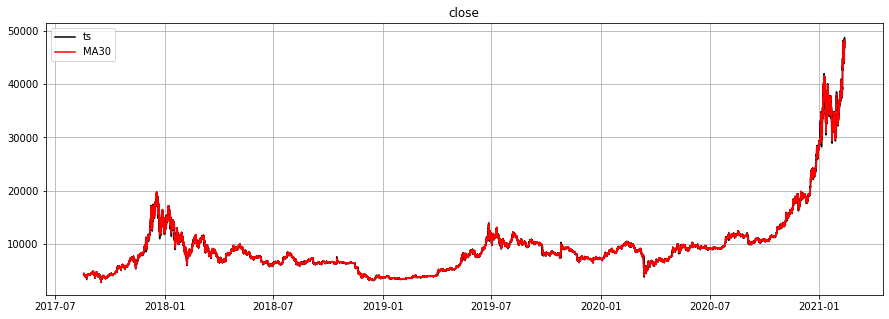

In [33]:
plot_ts(BTC_plot, plot_ma=True, plot_intervals=True, window=30, figsize=(15,5))

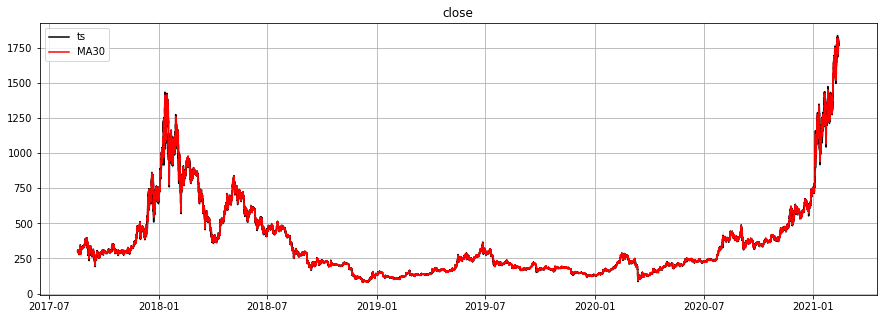

In [34]:
plot_ts(ETH['close'], plot_ma=True, plot_intervals=True, window=30, figsize=(15,5))

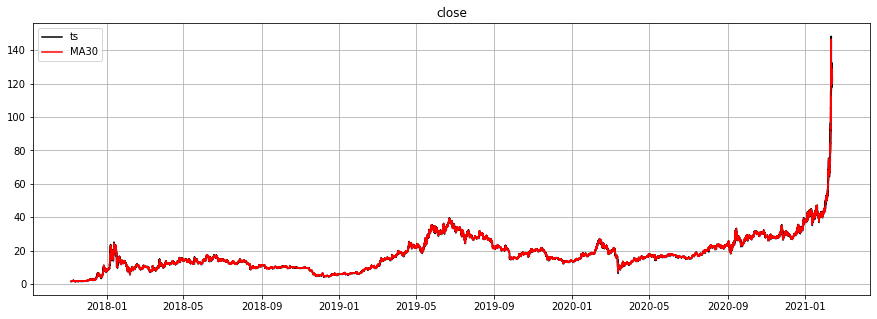

In [35]:
plot_ts(BNB['close'], plot_ma=True, plot_intervals=True, window=30, figsize=(15,5))

## Resample

In [140]:
def _downsample_binance_data(df, dt_col='open_time', freq='1H'):
    return df.asfreq(freq)

In [162]:
BTC = _downsample_binance_data(BTC)
ETH = _downsample_binance_data(ETH)
BNB = _downsample_binance_data(BNB)

In [163]:
BTC[BTC.close.isna()]

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
open_time,,,,,,,,,
2017-09-06 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-06 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-06 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-06 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-06 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-21 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-21 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-21 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
def _downsample_binance_data_dict(data_dict, dt_col='open_time', freq='1H'):
    for key, value in data_dict.items():
        data_dict[key] = value.asfreq(freq).reset_index()
    return data_dict

In [76]:
data_dict

{'BNB':                            open        high         low       close  \
 open_time                                                             
 2017-11-06 03:54:00    1.500000    1.500000    1.500000    1.500000   
 2017-11-06 03:55:00    1.300000    1.300000    1.300000    1.300000   
 2017-11-06 03:56:00    1.300000    1.300000    0.500000    0.500000   
 2017-11-06 03:57:00    0.500000    0.610000    0.500000    0.610000   
 2017-11-06 03:58:00    1.100000    1.100000    1.100000    1.100000   
 ...                         ...         ...         ...         ...   
 2021-02-11 23:36:00  124.051697  124.099403  123.923698  123.974602   
 2021-02-11 23:37:00  123.985298  124.003799  123.813004  123.820396   
 2021-02-11 23:38:00  123.841499  123.952698  123.641502  123.700897   
 2021-02-11 23:39:00  123.770897  123.931396  123.337097  123.884598   
 2021-02-11 23:40:00  123.884598  123.951103  123.635597  123.754402   
 
                           volume  quote_asset_volume  

In [80]:
data_dict_ = _downsample_binance_data_dict(data_dict)

In [81]:
data_dict_

{'BNB':                 open_time        open        high         low       close  \
 0     2017-11-06 03:54:00    1.500000    1.500000    1.500000    1.500000   
 1     2017-11-06 04:54:00    1.545100    1.545100    1.545100    1.545100   
 2     2017-11-06 05:54:00    1.552000    1.552000    1.552000    1.552000   
 3     2017-11-06 06:54:00    1.655900    1.659200    1.655900    1.659200   
 4     2017-11-06 07:54:00    1.610500    1.610500    1.610500    1.610500   
 ...                   ...         ...         ...         ...         ...   
 28647 2021-02-11 18:54:00  123.957703  124.020203  123.702301  123.758102   
 28648 2021-02-11 19:54:00  121.492897  121.868103  121.491898  121.713600   
 28649 2021-02-11 20:54:00  120.834999  120.907501  120.584297  120.644501   
 28650 2021-02-11 21:54:00  121.570900  121.604797  121.400002  121.450897   
 28651 2021-02-11 22:54:00  125.420601  125.660301  125.249496  125.349197   
 
             volume  quote_asset_volume  number_of_trad

## Data selection

In [11]:
BTC = BTC.query("open_time > '2020-10-01'")

--- splitting at index:  29588 | 2021-01-01 00:00:00 | test size: 0.03  ---


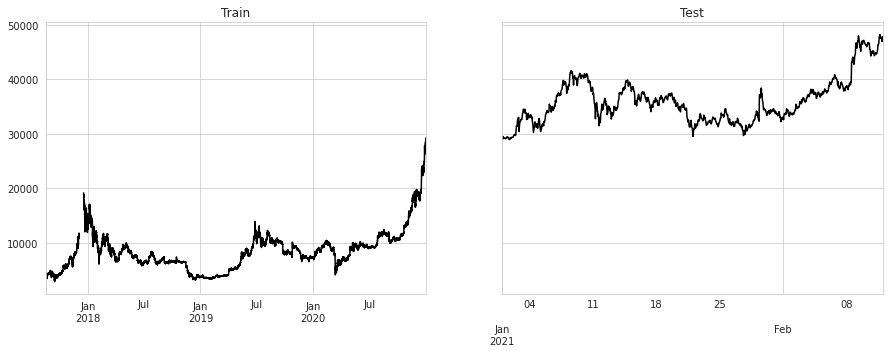

train: 29588 obs  |  test: 1008 obs


In [35]:
ts_train, ts_test = split_train_test(BTC['close'], exog=None, test="2021-01-01", plot=True, figsize=(15,5))
print("train:", len(ts_train), "obs  |  test:", len(ts_test), "obs")

## Neural Net (LSTM)

In [36]:
'''
Plot loss and metrics of keras training.
'''


def utils_plot_keras_training(training):
    metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15, 3))

    ## training
    ax[0].set(title="Training")
    ax11 = ax[0].twinx()
    ax[0].plot(training.history['loss'], color='black')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax11.plot(training.history[metric], label=metric)
    ax11.set_ylabel("Score", color='steelblue')
    ax11.legend()

    ## validation
    ax[1].set(title="Validation")
    ax22 = ax[1].twinx()
    ax[1].plot(training.history['val_loss'], color='black')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax22.plot(training.history['val_' + metric], label=metric)
    ax22.set_ylabel("Score", color="steelblue")
    plt.show()


'''
Preprocess a ts for LSTM partitioning into X and y.
:parameter
    :param ts: pandas timeseries
    :param s: num - number of observations per seasonal (ex. 7 for weekly seasonality with daily data, 12 for yearly seasonality with monthly data)
    :param scaler: sklearn scaler object - if None is fitted
    :param exog: pandas dataframe or numpy array
:return
    X with shape: (len(ts)-s, s, features)
    y with shape: (len(ts)-s,)
    the fitted scaler
'''


def utils_preprocess_lstm(ts, s, scaler=None, exog=None):
    ## scale
    if scaler is None:
        scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    ts_preprocessed = scaler.fit_transform(ts.values.reshape(-1, 1)).reshape(-1)

    ## create X (N,s,x)  and y (N,)
    ts_preprocessed = kprocessing.sequence.TimeseriesGenerator(data=ts_preprocessed,
                                                               targets=ts_preprocessed,
                                                               length=s, batch_size=1)
    lst_X, lst_y = [], []
    for i in range(len(ts_preprocessed)):
        xi, yi = ts_preprocessed[i]
        lst_X.append(xi[0])
        lst_y.append(yi[0])
    X = np.expand_dims(np.array(lst_X), axis=2)
    y = np.array(lst_y)
    return X, y, scaler


'''
Get fitted values from LSTM.
'''


def utils_fitted_lstm(ts, model, scaler, exog=None):
    ## scale
    s = model.input_shape[1]
    ts_preprocessed = scaler.transform(ts.values.reshape(-1, 1)).reshape(-1)

    ## create Xy, predict = fitted
    lst_fitted = [np.nan] * s
    for i in range(len(ts_preprocessed)):
        end_ix = i + s
        if end_ix > len(ts_preprocessed) - 1:
            break
        X = ts_preprocessed[i:end_ix]
        X = np.array(X)
        X = np.reshape(X, (1, s, 1))
        fit = model.predict(X)
        fit = scaler.inverse_transform(fit)[0][0]
        lst_fitted.append(fit)
    return np.array(lst_fitted)


'''
Predict ts with LSTM using previous predictions.
'''


def utils_predict_lstm(last_s_obs, model, scaler, pred_ahead, exog=None):
    ## scale
    s = model.input_shape[1]
    ts_preprocessed = list(scaler.transform(last_s_obs.values.reshape(-1, 1)))

    ## predict, append, re-predict
    lst_preds = []
    for i in range(pred_ahead):
        X = np.array(ts_preprocessed[len(ts_preprocessed) - s:])
        X = np.reshape(X, (1, s, 1))
        pred = model.predict(X)
        ts_preprocessed.append(pred[0])
        pred = scaler.inverse_transform(pred)[0][0]
        lst_preds.append(pred)
    return np.array(lst_preds)


'''
Fit Long Short-Term Memory neural network.
:parameter
    :param ts: pandas timeseries
    :param exog: pandas dataframe or numpy array
    :param s: num - number of observations per seasonal (ex. 7 for weekly seasonality with daily data, 12 for yearly seasonality with monthly data)
:return
    dtf with predictons and the model 
'''


def fit_lstm(ts_train, ts_test, model, exog=None, s=20, epochs=100, conf=0.95, figsize=(15, 5), batch_size=3):
    ## check
    print("Seasonality: using the last", s, "observations to predict the next 1")

    ## preprocess train
    X_train, y_train, scaler = utils_preprocess_lstm(ts_train, scaler=None, exog=exog, s=s)
    print("--- X:", X_train.shape, "| y:", y_train.shape, "---")

    ## lstm
    if model is None:
        model = models.Sequential()
        model.add(layers.LSTM(input_shape=X_train.shape[1:], units=50, activation='relu', return_sequences=False))
        model.add(layers.Dense(1))
        model.compile(optimizer='adam', loss='mean_absolute_error')
        print(model.summary())

    ## train
    verbose = 1 if epochs > 1 else 1
    training = model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=verbose,
                         validation_split=0.3)
    dtf_train = ts_train.to_frame(name="ts")
    dtf_train["model"] = utils_fitted_lstm(ts_train, training.model, scaler, exog)
    dtf_train["model"] = dtf_train["model"].fillna(method='bfill')

    ## test
    last_s_obs = ts_train[-s:]
    preds = utils_predict_lstm(last_s_obs, training.model, scaler, pred_ahead=len(ts_test), exog=None)
    dtf_test = ts_test.to_frame(name="ts").merge(pd.DataFrame(data=preds, index=ts_test.index, columns=["forecast"]),
                                                 how='left', left_index=True, right_index=True)

    ## evaluate
    dtf = dtf_train.append(dtf_test)
    dtf = utils_evaluate_ts_model(dtf, conf=conf, figsize=figsize, title="LSTM (memory:" + str(s) + ")")
    return dtf, training.model


'''
Forecast unknown future.
:parameter
    :param ts: pandas series
    :param model: model object
    :param pred_ahead: number of observations to forecast (ex. pred_ahead=30)
    :param end: string - date to forecast (ex. end="2016-12-31")
    :param freq: None or str - 'B' business day, 'D' daily, 'W' weekly, 'M' monthly, 'A' annual, 'Q' quarterly
    :param zoom: for plotting
'''


def forecast_lstm(ts, model=None, epochs=100, pred_ahead=None, end=None, freq="D", conf=0.95, zoom=30, figsize=(15, 5)):
    ## model
    if model is None:
        model = models.Sequential([
            layers.LSTM(input_shape=(1, 1), units=50, activation='relu', return_sequences=False),
            layers.Dense(1)])
        model.compile(optimizer='adam', loss='mean_absolute_error')

    ## fit
    s = model.input_shape[1]
    X, y, scaler = utils_preprocess_lstm(ts, scaler=None, exog=None, s=s)
    training = model.fit(x=X, y=y, batch_size=1, epochs=epochs, shuffle=True, verbose=0, validation_split=0.3)
    dtf = ts.to_frame(name="ts")
    dtf["model"] = utils_fitted_lstm(ts, training.model, scaler, None)
    dtf["model"] = dtf["model"].fillna(method='bfill')

    ## index
    index = utils_generate_indexdate(start=ts.index[-1], end=end, n=pred_ahead, freq=freq)

    ## forecast
    last_s_obs = ts[-s:]
    preds = utils_predict_lstm(last_s_obs, training.model, scaler, pred_ahead=len(index), exog=None)
    dtf = dtf.append(pd.DataFrame(data=preds, index=index, columns=["forecast"]))

    ## add intervals and plot
    dtf = utils_add_forecast_int(dtf, conf=conf, zoom=zoom)
    return dtf

In [40]:
s = 24
n_features = 1

In [41]:
# Number of features is 1
model = models.Sequential()
model.add( layers.LSTM(input_shape=(s,n_features), units=3, activation='relu', return_sequences=True) )
model.add( layers.Dropout(0.3) )
model.add( layers.LSTM(units=3, activation='relu', return_sequences=False) )
model.add( layers.Dense(1) )
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 24, 3)             60        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 3)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 3)                 84        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 148
Trainable params: 148
Non-trainable params: 0
_________________________________________________________________


In [42]:
dtf, model = fit_lstm(ts_train, ts_test, model, exog=None, s=s, epochs=1, conf=0.20, figsize=(15,10), batch_size=6)

Seasonality: using the last 24 observations to predict the next 1
--- X: (29564, 24, 1) | y: (29564,) ---
3449/3449 [==============================] - 89s 26ms/step - loss: nan - val_loss: nan


KeyboardInterrupt: 

In [ ]:
time_stamp = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))
model.save(f'/models/lstm_{time_stamp}')

## Prophet

In [82]:
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib.pyplot import figure
sns.set_style('whitegrid')
figure(num=None, figsize=(30, 20), dpi=80, facecolor='w', edgecolor='k')
%matplotlib inline
import datetime
from datetime import date, timedelta

from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly, add_changepoints_to_plot
from fbprophet.diagnostics import performance_metrics, cross_validation
import itertools
import numpy as np
import pandas as pd
from textwrap import wrap
import datetime
from datetime import date, timedelta
import copy

In [ ]:
def _combine_frame(frame_list, date_field='date')

In [97]:
def fit_prophet(data_dict_
                , features=None
                , cutoff=None
                , grid=None
                , initial=364.25
                , period=24
                , horizon=4
                , interval_width=.90
                , changepoint_range=.1
                , cutoff_val=None):
    
    data_dict = copy.deepcopy(data_dict_)
    # Deal with cutoff arg
    if cutoff:
        for ticker, df in data_dict.items():
            data_dict[ticker] = df.query(f"open_time>'{cutoff}'")
        
    # Deal with grid arg
    if grid:
        param_grid = grid
    else:
        param_grid = {  
                    'changepoint_prior_scale': [ 0.1, 0.5, 1, 1.5, 2],
                    'seasonality_prior_scale': [0.001]#, 0.1, 1.0],
                    #'seasonality_mode': ['multiplicative', 'additive']
                    }
    
    model_dict = {}


        

    error_list = []
    
    for ticker, df in data_dict.items():
        
        
        try:
    #         print(product)
           # df_P = df_A.query(f"CARRIER=='{product}'")


            # CONTINUE ON ACTUAL CHURN MODEL HERE
            dfpr = pd.DataFrame()
            df = df.reset_index()
            dfpr['ds'] = df['open_time'].copy()
            dfpr['y'] = df['close'].copy()

            #INJECT ACTIVE SERIES HERE FOR FITTING FRAME
            if features is not None:
                dfpr = dfpr.merge(active_series, on='ds')

            # Generate all combinations of parameters
            best_changepoint_prior_scale, best_seasonality_prior_scale, tuning_results, val_mape = prophet_gridsearch(changepoint_range
                                                                                                                      ,cutoff_val
                                                                                                                      ,features
                                                                                                                      ,dfpr
                                                                                                                      ,horizon
                                                                                                                      ,initial
                                                                                                                      ,param_grid
                                                                                                                      ,period)

            model = Prophet(
                            changepoint_prior_scale=best_changepoint_prior_scale,
                            changepoint_range=changepoint_range,
                            seasonality_prior_scale=best_seasonality_prior_scale,
                            interval_width=.90,
                           # n_changepoints=100
                            #yearly_seasonality=True
                           )
            if features is not None:
                    model.add_regressor('active')
            model.fit(dfpr)

            future = model.make_future_dataframe(periods=4, freq='H')
            if features is not None:
                future = future.merge(active_series, on='ds')
            forecast = model.predict(future)

            # Plot 
            figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
            sns.lineplot(x=df['open_time'],y=df['close']).set_title(f'''Fitted model (orange) vs actual (blue) 
                                                                                            Validation Mean Abs percentage error: {round(val_mape*100,2)}%''')
            sns.lineplot(x=forecast['ds'], y=forecast['yhat']).set_title(f'''Fitted model (orange) vs actual (blue)
                                                                            Validation Mean Abs percentage error: {round(val_mape*100,2)}%''')

            plt.title(f"Fitted model (orange) vs actual (blue) {ticker} \n%s" % "\n"
                      .join(wrap(f"Validation Abs percentage  error: {round(val_mape*100,2)}%", width=60)))

            #plot_plotly(model, forecast,  xlabel='date', ylabel='Churn requests')
            fig1 = model.plot(forecast, xlabel='date', ylabel='USDT PRICE',
                figsize=(16, 10))
            a = add_changepoints_to_plot(fig1.gca(), model, forecast)
            model_dict[f'{ticker}']=[model, forecast, tuning_results]

        except ValueError as VE:
            print(f"error for {ticker} !!!!!!!!!!!!!!!!!!!!!!!!!")
            print(VE)
            print(df)
            error_list.append(ticker)
            
#    a = add_changepoints_to_plot(fig1.gca(), model, forecast)
#     fig2 = model.plot_components(forecast)
    return model_dict, error_list

def prophet_gridsearch(changepoint_range, cutoff_val, features, dfpr, horizon, initial, param_grid, period):
    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    mapes = []  # Store the MAPEs for each params here
# Use cross validation to evaluate all parameters
    for params in all_params:
                m = Prophet(**params
                            , changepoint_range=changepoint_range
                           # , n_changepoints=100
                           )  # Fit model with given params
                #m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
                if features is not None:
                    m.add_regressor('active')
                m.fit(dfpr)
                df_cv = cross_validation(m, initial=f'{initial} days', period=f'{period} hours', horizon=f'{horizon} hours', parallel="processes", cutoffs=cutoff_val)
                df_p = performance_metrics(df_cv, rolling_window=1)
                if 'mape' in df_p:
                    mapes.append(df_p['mape'].values[0])
                else:
                    mapes.append(df_p['mae'].values[0])
                    print("EVALUATED WITH MAE AS NO MAPE AVAILABLE")
    # Find the best parameters
    tuning_results = pd.DataFrame(all_params)
    tuning_results['mape'] = mapes
    tuning_results.sort_values(by='mape', inplace=True)
    tuning_results.reset_index(inplace=True)
    tuning_results.drop('index', axis=1, inplace=True)
    best_changepoint_prior_scale = tuning_results.loc[0, 'changepoint_prior_scale']
    best_seasonality_prior_scale = tuning_results.loc[0, 'seasonality_prior_scale']
    val_mape = tuning_results.loc[0, 'mape']
    return best_changepoint_prior_scale, best_seasonality_prior_scale, tuning_results, val_mape

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 43 forecasts with cutoffs between 2020-12-31 18:54:00 and 2021-02-11 18:54:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f082c5b6760>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 43 forecasts with cutoffs between 2020-12-31 18:54:00 and 2021-02-11 18:54:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f082ba0ea30>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 43 forecasts with cutoffs between 2020-12-31 18:54:00 and 2021-02-11 18:54:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f082c52dbb0>
INFO:fbprophet:Disabling yearly seasonality

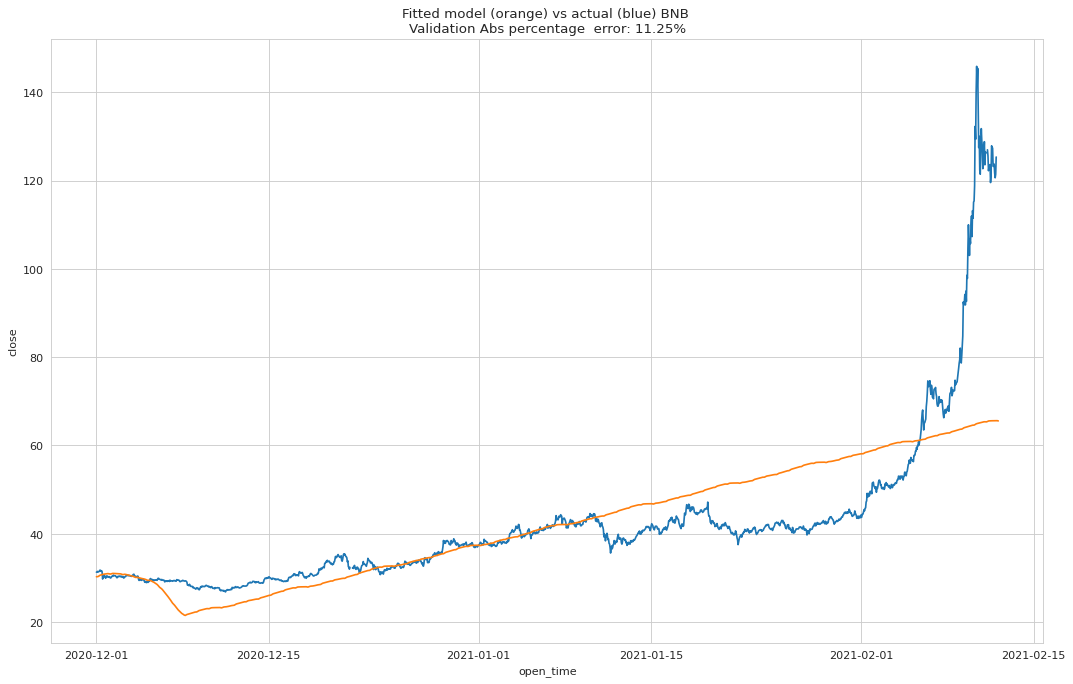

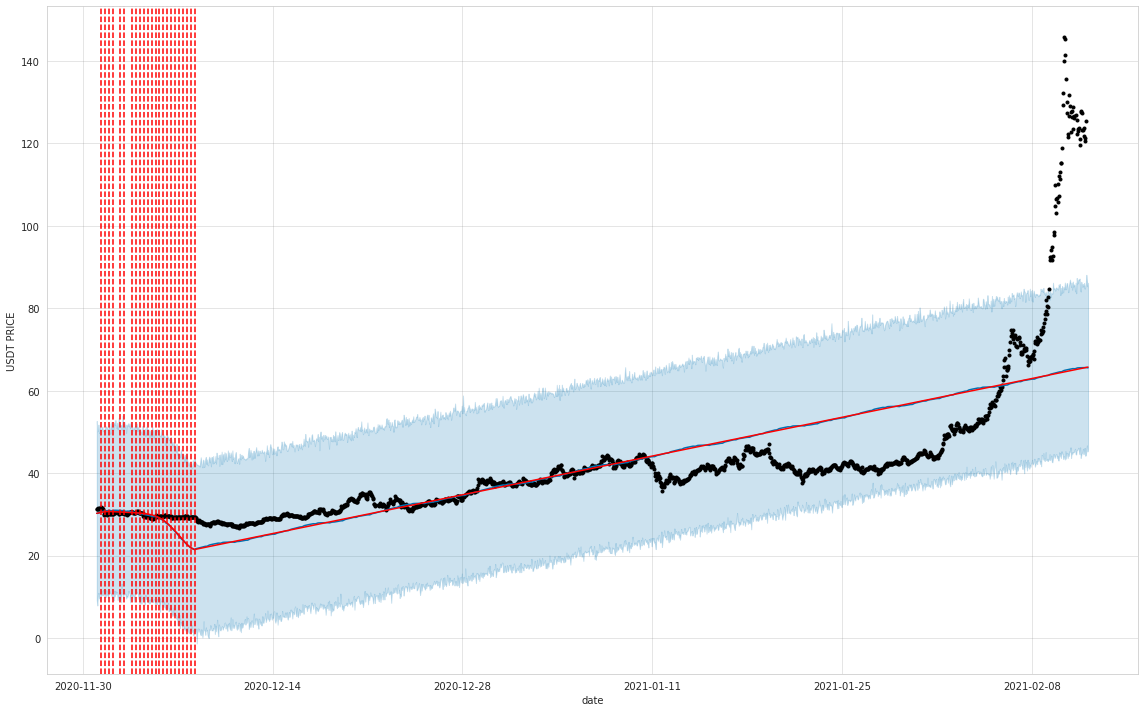

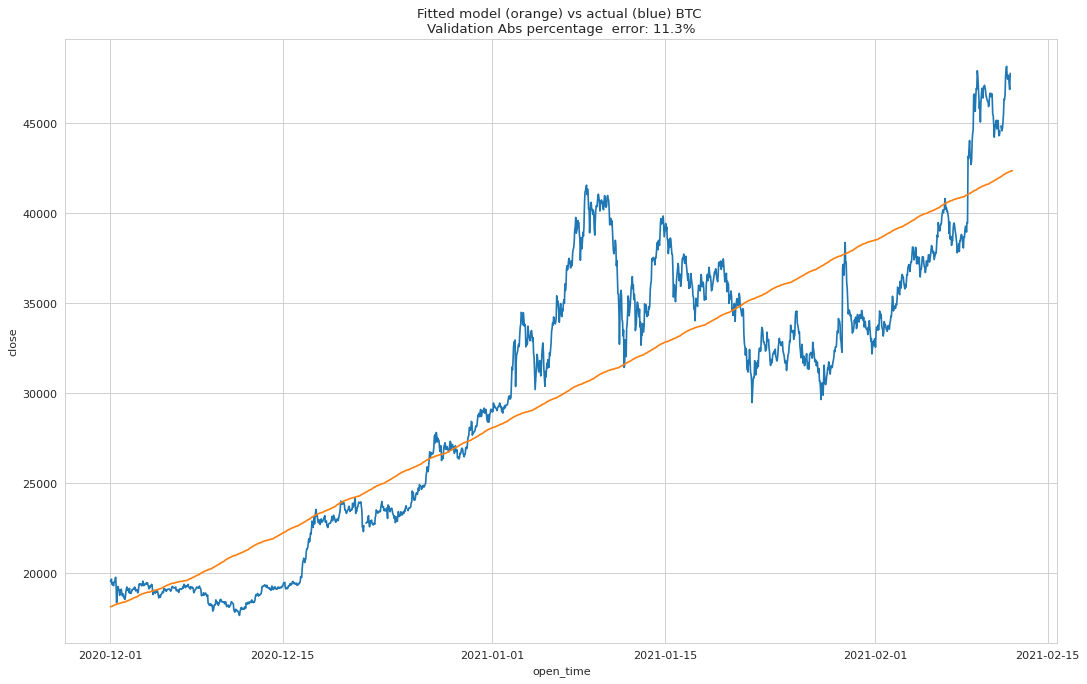

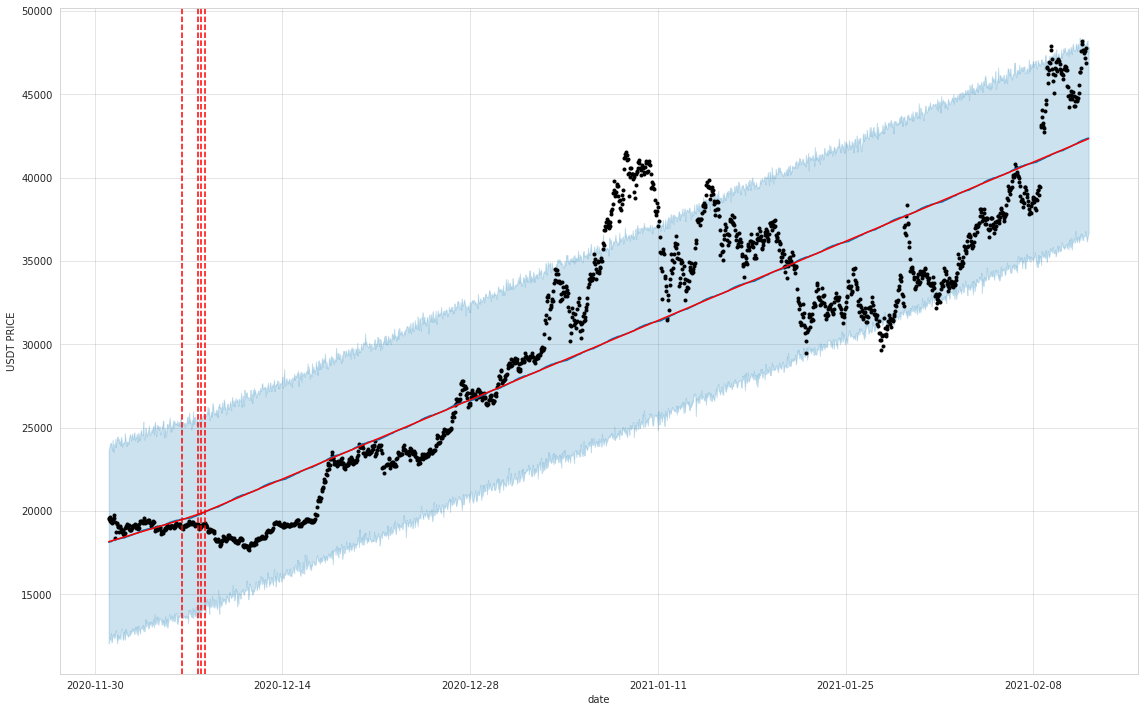

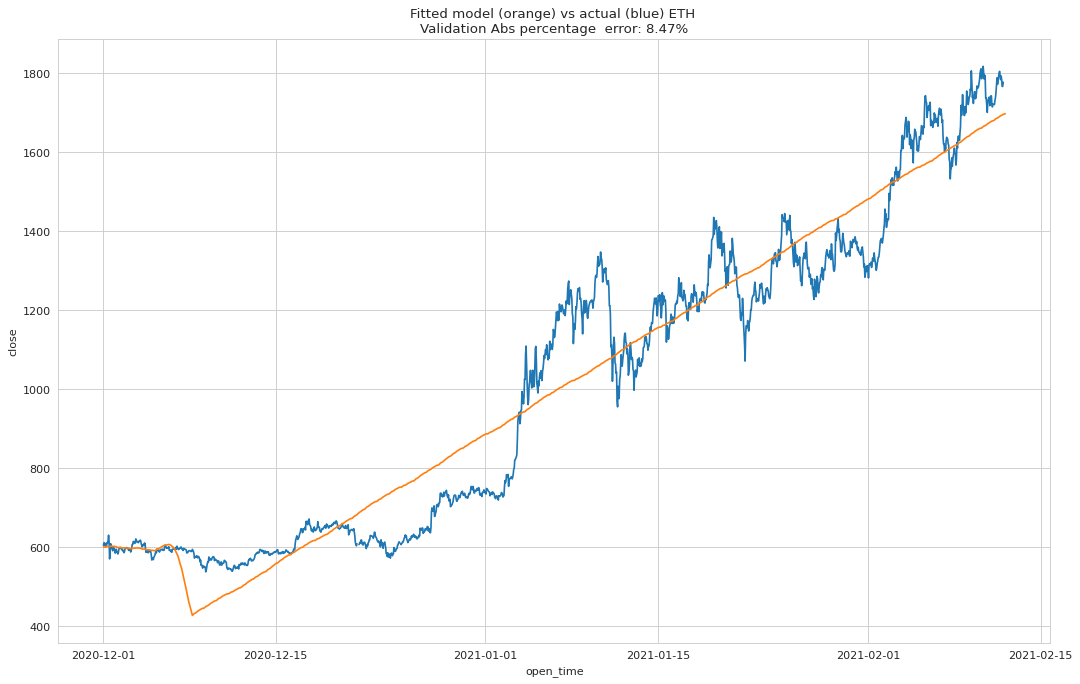

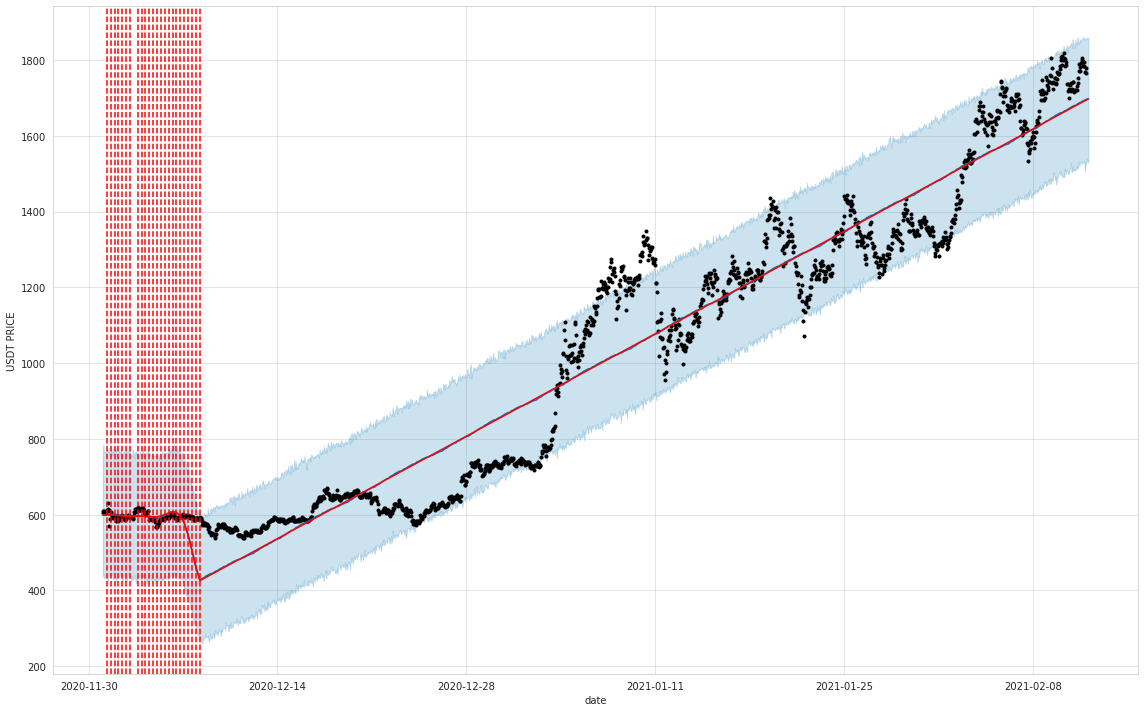

In [98]:
model_dict = fit_prophet(data_dict, cutoff='2020-12-01', initial=30, horizon=4)

## NeuralProphet

In [100]:
from neuralprophet import NeuralProphet

In [168]:
df = BTC.reset_index().rename(columns={'close': 'y', 'open_time': 'ds'})

In [169]:
df.sort_values('y')

,ds,open,high,low,y,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
41789,2017-09-15 11:30:00,2830.000000,2835.000000,2817.000000,2817.000000,7.846836,2.213319e+04,22,0.860209,2.428394e+03
41787,2017-09-15 11:28:00,2888.000000,2888.000000,2818.739990,2818.750000,7.801522,2.219912e+04,20,0.142950,4.128039e+02
41788,2017-09-15 11:29:00,2880.000000,2880.000000,2820.000000,2820.000000,1.076028,3.038967e+03,6,0.076028,2.189606e+02
41792,2017-09-15 11:33:00,2830.000000,2830.000000,2830.000000,2830.000000,0.200000,5.660000e+02,2,0.000000,0.000000e+00
41790,2017-09-15 11:31:00,2830.000000,2880.000000,2830.000000,2849.000000,3.515769,1.006870e+04,12,3.515769,1.006870e+04
...,...,...,...,...,...,...,...,...,...,...
1827969,2021-02-11 20:30:00,48590.371094,48599.980469,48454.121094,48490.761719,124.696747,6.048386e+06,3611,44.244232,2.146052e+06
1827970,2021-02-11 20:31:00,48490.761719,48565.339844,48451.359375,48511.550781,85.518684,4.149009e+06,2521,39.199528,1.902003e+06
1827971,2021-02-11 20:32:00,48511.539062,48596.730469,48485.570312,48556.960938,68.150276,3.308185e+06,1851,43.710342,2.121821e+06
1827968,2021-02-11 20:29:00,48636.601562,48678.898438,48501.109375,48591.750000,190.484146,9.257198e+06,4914,101.234917,4.921094e+06


In [222]:
m = NeuralProphet(
    n_forecasts=4,
    n_lags=60,
    #num_hidden_layers=1,
    #batch_size=64,
    epochs=100,
    learning_rate=1.0,
   # ar_sparsity=0.99,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_changepoints=20,
    #trend_reg=1.00,
    changepoints_range=1,
    impute_missing=True,
)

In [211]:
def add_missing_dates_nan(df, freq):
    """Fills missing datetimes in 'ds', with NaN for all other columns
    Args:
        df (pd.Dataframe): with column 'ds'  datetimes
        freq (str):Data step sizes. Frequency of data recording,
            Any valid frequency for pd.date_range, such as 'D' or 'M'
    Returns:
        dataframe without date-gaps but nan-values
    """
    if df["ds"].dtype == np.int64:
        df.loc[:, "ds"] = df.loc[:, "ds"].astype(str)
    df.loc[:, "ds"] = pd.to_datetime(df.loc[:, "ds"])

    data_len = len(df)
    r = pd.date_range(start=df["ds"].min(), end=df["ds"].max(), freq=freq)
    df_all = df.set_index("ds").reindex(r).rename_axis("ds").reset_index()
    num_added = len(df_all) - data_len
    return df_all, num_added

In [188]:
df_new, num = add_missing_dates_nan(df, "1H")

In [206]:
df_new.interpolate(method ='linear', limit_direction ='forward', inplace=True) 

In [207]:
df_new[df_new.y.isna()]

,ds,open,high,low,y,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume


In [212]:
num

-1797555

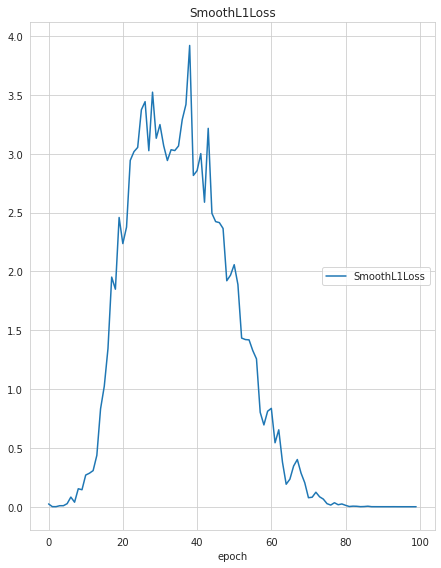

Epoch[100/100]: 100%|██████████| 100/100 [00:43<00:00,  2.30it/s, SmoothL1Loss=0.000126, MAE=104, RegLoss=0]


In [223]:
metrics = m.fit(df_new[['ds', 'y']]
                , freq="1H"
                , plot_live_loss=True)

In [221]:
metrics

,SmoothL1Loss,MAE,RegLoss
0,0.077330,2641.027864,0.0
1,0.001193,404.775646,0.0
2,0.002634,617.503553,0.0
3,0.012481,1475.151324,0.0
4,0.024247,1701.399671,0.0
...,...,...,...
95,0.000174,148.268376,0.0
96,0.000159,136.811105,0.0
97,0.000147,124.780336,0.0
98,0.000132,111.568922,0.0


In [ ]:
metrics.head(3)

In [224]:
fig1 = m.plot(forecast)
fig2 = m.plot_parameters()

NameError: name 'forecast' is not defined

In [228]:
future = m.make_future_dataframe(df_new[['ds', 'y']], periods=4, n_historic_predictions=len(df_new))
future.tail(3)

,ds,y,t,y_scaled
30597,2021-02-12 01:00:00,NaN,1.000065,NaN
30598,2021-02-12 02:00:00,NaN,1.000098,NaN
30599,2021-02-12 03:00:00,NaN,1.000131,NaN


In [229]:
m.highlight_nth_step_ahead_of_each_forecast(step_number=m.n_forecasts)

## Amazon Forecast